In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Let's find out the shape/size of our dataset
df.shape

(891, 12)

In [6]:
# Let's find out the data types and number of null values for each column/feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We find that there are missing values for age, and cabin. 'Embarked' has a couple of missing values which shouldn't be an issue. Let's take a look at the rows that have the 'Embarked parameter missing. Perhaps we can use features in these rows and others to determine what the value of embarking point would have been.

In [10]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let's start looking at some individual columns or features to observe their raw distribution.

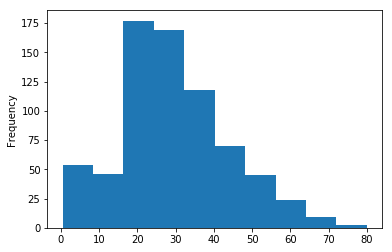

In [11]:
df['Age'].plot(kind='hist')

This tells us most of the people aboard the Titanic (or to be accurate, in this dataset) were in the age range of ~18-30, and we have a continuos decrease in frequency as we increase our age. Let us look at the distribution of the 'Age' feature in some more ways using methods available in Pandas.

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

You could also use df['Age'].value_counts(). These functions do a great job of giving us more information regarding the most common values held, mean, standard deviation, etc. However, we humans (most of us?) are much better at getting a quick perception and summary of the data using visualizations. So now, let's create multiple plots so that we can observe the raw distribution of all relevant features in the same figure.

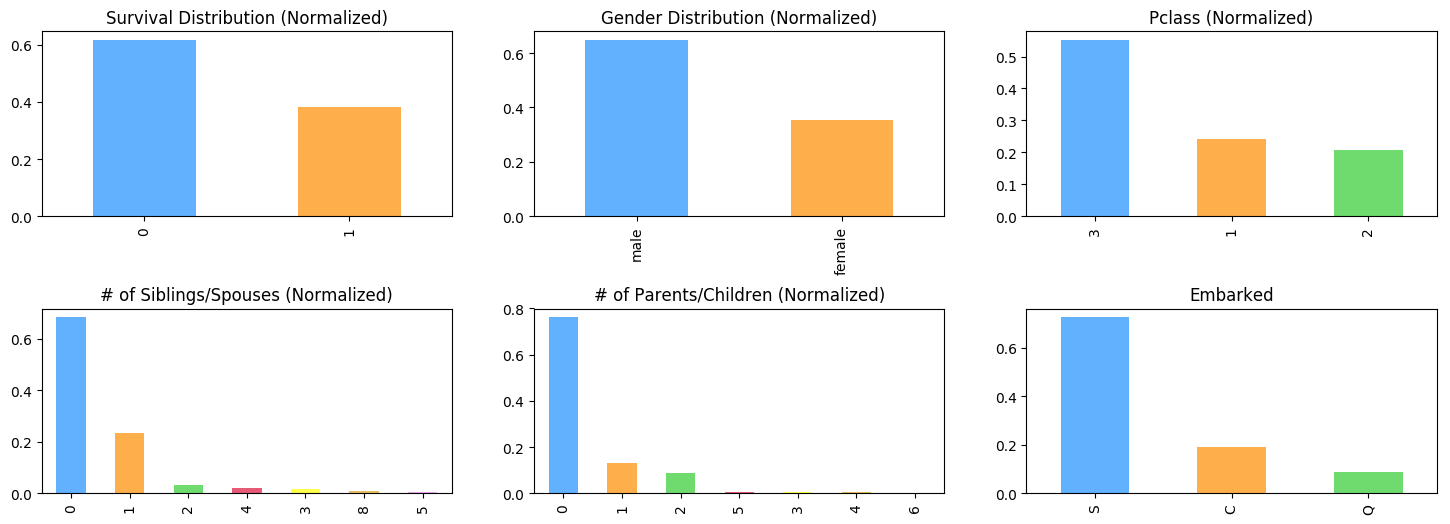

In [35]:
# Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
plt.style.use('default')

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((2,3), (0,0))
df['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival Distribution (Normalized)')

plt.subplot2grid((2,3), (0,1))
df['Sex'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Gender Distribution (Normalized)')

plt.subplot2grid((2,3), (0,2))
df['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Pclass (Normalized)')

plt.subplot2grid((2,3), (1,0))
df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32', 
                                                                            '#DC143C', '#FFFF00', '#DAA520',
                                                                           '#EE82EE'])
plt.title('# of Siblings/Spouses (Normalized)')

plt.subplot2grid((2,3), (1,1))
df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32',
                                                                           '#DC143C', '#FFFF00', '#DAA520',
                                                                           '#EE82EE'])
plt.title('# of Parents/Children (Normalized)')

plt.subplot2grid((2,3), (1,2))
df['Embarked'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Embarked')

plt.savefig('plots/dataset_distribution.png', dpi=300, transparent=False)